# Redes Neurais com Backpropagation para Funções Booleanas
Este notebook demonstra como implementar uma rede neural simples com uma camada oculta usando o algoritmo de **Backpropagation**, aplicada a funções booleanas como AND, OR e XOR. Também exploramos a influência da **taxa de aprendizado**, **uso de bias** e **função de ativação**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Funções de ativação
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    s = sigmoid(x)
    return s * (1 - s)

def tanh(x):
    return np.tanh(x)

def tanh_deriv(x):
    return 1 - np.tanh(x)**2

In [2]:
# Classe da Rede Neural
class NeuralNetwork:
    def __init__(self, n_inputs, n_hidden=4, learning_rate=0.1, epochs=1000, activation='sigmoid', use_bias=True):
        # Parâmetros da rede
        self.n_inputs = n_inputs                # Número de neurônios da camada de entrada
        self.n_hidden = n_hidden                # Número de neurônios na camada oculta
        self.learning_rate = learning_rate      # Taxa de aprendizado do algoritmo
        self.epochs = epochs                    # Número de épocas (iterações) para o treinamento
        self.use_bias = use_bias                # Indica se será usado termo de bias nas camadas

        # Inicialização dos pesos com valores aleatórios seguindo distribuição normal
        self.weights_input_hidden = np.random.randn(n_inputs, n_hidden)  # Pesos entre entrada e camada oculta
        self.weights_hidden_output = np.random.randn(n_hidden)          # Pesos entre camada oculta e saída

        # Inicialização dos biases, caso use bias, valores aleatórios; senão zeros
        if use_bias:
            self.bias_hidden = np.random.randn(n_hidden)   # Bias da camada oculta
            self.bias_output = np.random.randn(1)          # Bias da camada de saída
        else:
            self.bias_hidden = np.zeros(n_hidden)          # Bias zerado para camada oculta
            self.bias_output = np.zeros(1)                  # Bias zerado para camada de saída

        # Escolha da função de ativação conforme parâmetro passado (sem leaky_relu)
        if activation == 'sigmoid':
            self.activation = sigmoid                     # Função sigmoide para ativação
            self.activation_deriv = sigmoid_deriv         # Derivada da função sigmoide para backpropagation
        elif activation == 'tanh':
            self.activation = tanh                         # Função tangente hiperbólica para ativação
            self.activation_deriv = tanh_deriv             # Derivada da tanh para backpropagation
        else:
            raise ValueError("Função de ativação não suportada: use 'sigmoid' ou 'tanh'.")

    def forward(self, x):
        """Propagação para frente (cálculo da saída da rede)"""
        self.input = x

        # Cálculo da entrada da camada oculta (produto escalar + bias)
        self.hidden_input = np.dot(x, self.weights_input_hidden) + self.bias_hidden
        # Aplicação da função de ativação na camada oculta
        self.hidden_output = self.activation(self.hidden_input)

        # Cálculo da entrada da camada de saída (produto escalar + bias)
        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        # Aplicação da função de ativação na camada de saída
        self.output = self.activation(self.output_input)

        return self.output

    def train(self, X, y):
        """Treinamento da rede neural usando algoritmo de backpropagation"""
        for epoch in range(self.epochs):
            for xi, target in zip(X, y):
                output = self.forward(xi)  # Propagação para frente com entrada xi

                # Cálculo do erro (diferença entre valor esperado e saída da rede)
                error = target - output

                # Cálculo do gradiente do erro na camada de saída
                d_output = error * self.activation_deriv(self.output_input)

                # Cálculo do gradiente do erro na camada oculta (propagando o erro para trás)
                d_hidden = d_output * self.weights_hidden_output * self.activation_deriv(self.hidden_input)

                # Atualização dos pesos da camada oculta para saída (gradiente descendente)
                self.weights_hidden_output += self.learning_rate * d_output * self.hidden_output
                # Atualização dos pesos da camada de entrada para oculta
                self.weights_input_hidden += self.learning_rate * np.outer(xi, d_hidden)

                # Atualização dos biases, se habilitados
                if self.use_bias:
                    self.bias_output += self.learning_rate * d_output
                    self.bias_hidden += self.learning_rate * d_hidden

    def plot_decision_boundary(self, X, y):
        """Plota a fronteira de decisão da rede (funciona apenas para 2 entradas)"""
        if self.n_inputs != 2:
            print("Plot disponível apenas para 2 entradas.")
            return

        # Define o intervalo do gráfico no eixo x e y
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

        # Cria uma grade (meshgrid) para mapear o espaço 2D
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                             np.arange(y_min, y_max, 0.05))
        grid = np.c_[xx.ravel(), yy.ravel()]

        # Calcula a saída da rede para cada ponto da grade
        Z = np.array([self.forward(point) for point in grid])
        Z = Z.reshape(xx.shape)

        # Plota a região de decisão da rede com cores diferentes
        plt.contourf(xx, yy, Z, alpha=0.4, levels=[0, 0.5, 1], colors=["#FFAAAA", "#AAAAFF"])
        # Plota os pontos de dados reais com cor conforme o rótulo
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
        plt.title("Fronteira de Decisão da Rede Neural")
        plt.show()


In [3]:
# Funções para gerar dados booleanos
def generate_and_data():
    X = np.array([[0,0],[0,1],[1,0],[1,1]])
    y = np.array([0, 0, 0, 1])
    return X, y

def generate_or_data():
    X = np.array([[0,0],[0,1],[1,0],[1,1]])
    y = np.array([0, 1, 1, 1])
    return X, y

def generate_xor_data():
    X = np.array([[0,0],[0,1],[1,0],[1,1]])
    y = np.array([0, 1, 1, 0])
    return X, y


=== Testando com ativação: sigmoid ===


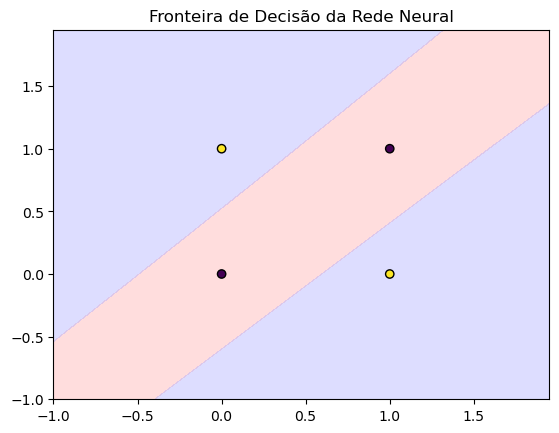

Previsões: [0.1, 0.88, 0.92, 0.08]

=== Testando com ativação: tanh ===


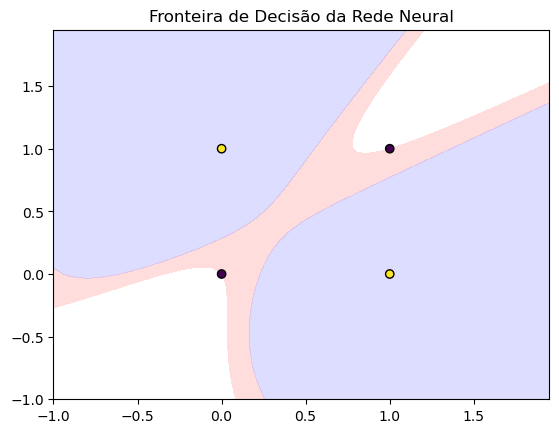

Previsões: [0.0, 0.99, 0.99, -0.0]


In [4]:
# Gerar dados XOR
X, y = generate_xor_data()

# Lista de funções de ativação a serem testadas
activation_functions = ['sigmoid', 'tanh']

for func in activation_functions:
    print(f"\n=== Testando com ativação: {func} ===")
    nn = NeuralNetwork(n_inputs=2, n_hidden=4, learning_rate=0.1, epochs=5000, activation=func)
    nn.train(X, y)
    nn.plot_decision_boundary(X, y)
    preds = [round(nn.forward(x)[0], 2) for x in X]
    print("Previsões:", preds)
